In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-engagement-report-2023jan-jun/Netflix_Engagement_Report_2023_Jan-Jun_cleaned.csv


In [2]:
movies = pd.read_csv('/kaggle/input/netflix-engagement-report-2023jan-jun/Netflix_Engagement_Report_2023_Jan-Jun_cleaned.csv')
movies.head()

,Title,Available Globally,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,3/23/2023,812100000
1,Ginny & Georgia: Season 2,Yes,1/5/2023,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,622800000
3,Wednesday: Season 1,Yes,11/23/2022,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,503000000


In [3]:
movies.columns

Index(['Title', 'Available Globally', 'Release Date', 'Hours Viewed'], dtype='object')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               18214 non-null  object
 1   Available Globally  18214 non-null  object
 2   Release Date        4855 non-null   object
 3   Hours Viewed        18214 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.3+ KB


In [5]:
movies.describe(include='all')

,Title,Available Globally,Release Date,Hours Viewed
count,18214,18214,4855,1.821400e+04
unique,18214,2,1665,NaN
top,The Night Agent: Season 1,No,3/20/2020,NaN
freq,1,13700,16,NaN
mean,NaN,NaN,NaN,5.130954e+06
std,NaN,NaN,NaN,1.871767e+07
min,NaN,NaN,NaN,1.000000e+05
25%,NaN,NaN,NaN,2.000000e+05
50%,NaN,NaN,NaN,7.000000e+05
75%,NaN,NaN,NaN,3.400000e+06


In [6]:
movies.isna().sum()

Title                     0
Available Globally        0
Release Date          13359
Hours Viewed              0
dtype: int64

In [7]:
movies.duplicated().sum()

0

In [8]:
movies.shape

(18214, 4)

In [9]:
movies.nunique()

Title                 18214
Available Globally        2
Release Date           1665
Hours Viewed            712
dtype: int64

In [10]:
movies['Release Date'] = pd.to_datetime(movies['Release Date'], errors='coerce')

In [11]:
movies['Release Year'] = movies['Release Date'].dt.year

In [12]:
movies.head()

,Title,Available Globally,Release Date,Hours Viewed,Release Year
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,2023.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,2023.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,2022.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000,2022.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,2023.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

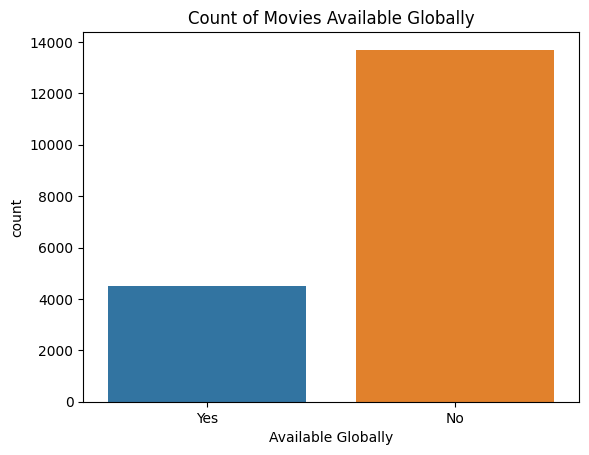

In [14]:
sns.countplot(x='Available Globally', data=movies)
plt.title('Count of Movies Available Globally')
plt.show()

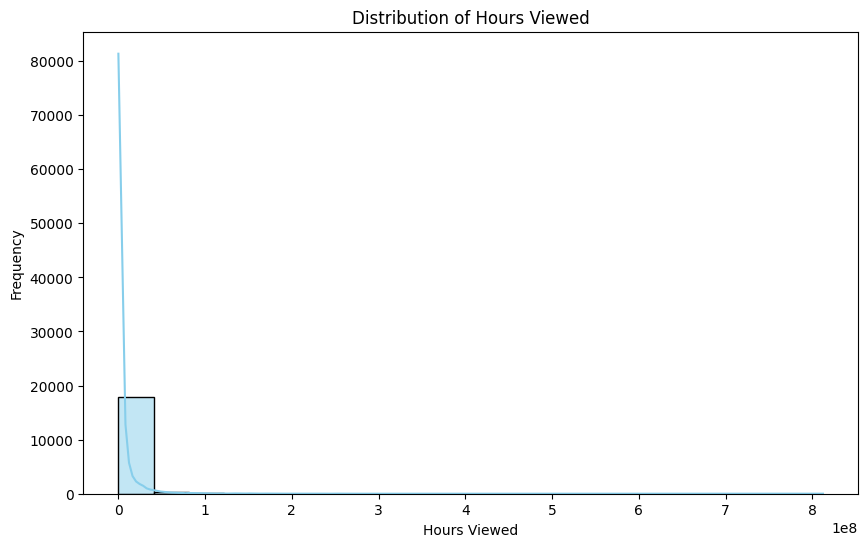

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['Hours Viewed'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Hours Viewed')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Viewed')
plt.show()

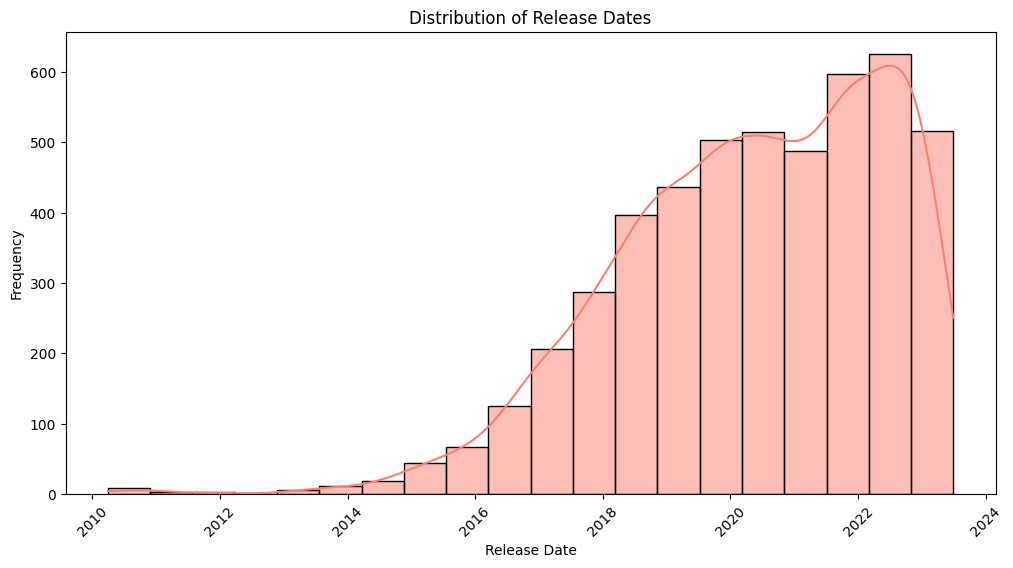

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(movies['Release Date'], bins=20, kde=True, color='salmon')
plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.title('Distribution of Release Dates')
plt.xticks(rotation=45)
plt.show()

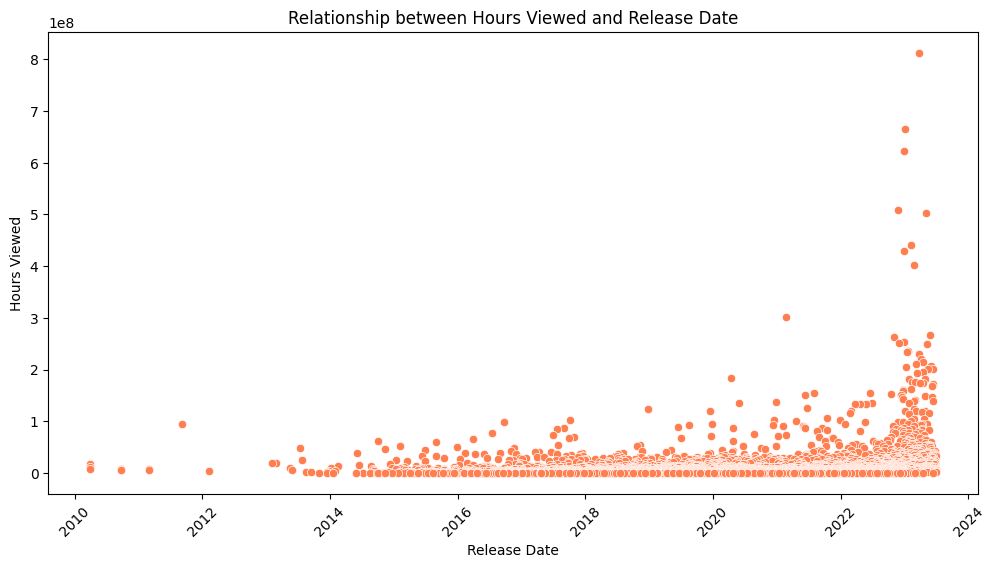

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Release Date', y='Hours Viewed', data=movies, color='coral')
plt.xlabel('Release Date')
plt.ylabel('Hours Viewed')
plt.title('Relationship between Hours Viewed and Release Date')
plt.xticks(rotation=45)
plt.show()

In [18]:
top_10_most_viewed = movies.sort_values(by='Hours Viewed', ascending=False)

In [19]:
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Hours Viewed', y='Title', data=top_10_most_viewed, palette='viridis')
# plt.xlabel('Hours Viewed')
# plt.ylabel('Title')
# plt.title('Top 10 Most Viewed Titles')
# plt.show()

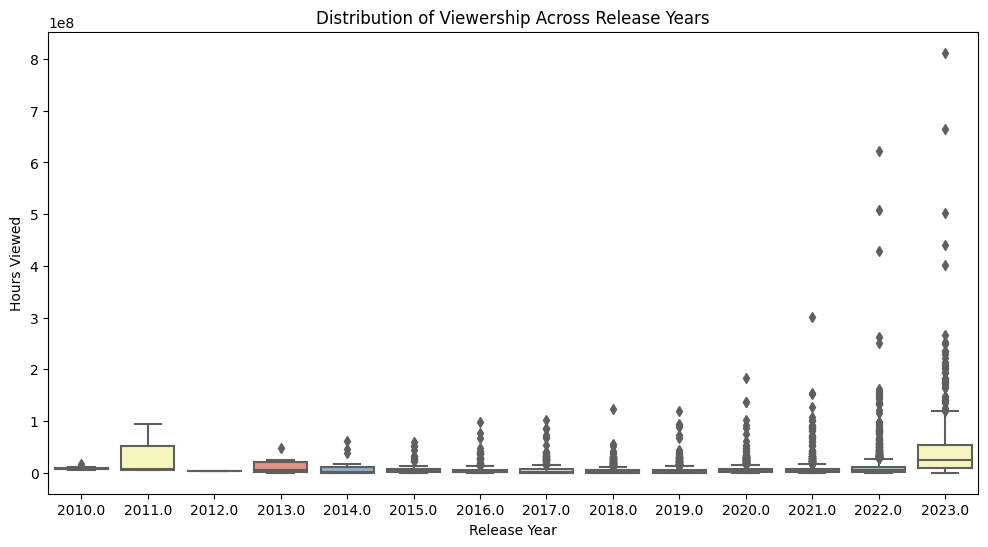

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Release Year', y='Hours Viewed', data=movies, palette='Set3')
plt.xlabel('Release Year')
plt.ylabel('Hours Viewed')
plt.title('Distribution of Viewership Across Release Years')
plt.show()

In [21]:
# plt.figure(figsize=(8, 8))
# plt.pie(top_10_most_viewed['Hours Viewed'], labels=top_10_most_viewed['Title'], autopct='%1.1f%%', startangle=140)
# plt.title('Proportion of Viewership for Top 10 Most Viewed Titles')
# plt.show()